In [ ]:
from fastai.vision.all import *

In [ ]:
path = untar_data(URLs.FLOWERS)

In [ ]:
path/"image"

Path('/home/nex/.fastai/data/oxford-102-flowers/image')

In [ ]:
train_df = pd.read_csv("/home/nex/.fastai/data/oxford-102-flowers/test.txt", sep=" ", header= None)

In [ ]:
flower_names = [
    "pink primrose", "hard-leaved pocket orchid", "canterbury bells",
    "sweet pea", "english marigold", "tiger lily", "moon orchid",
    "bird of paradise", "monkshood", "globe thistle", "snapdragon",
    "colt's foot", "king protea", "spear thistle", "yellow iris",
    "globe-flower", "purple coneflower", "peruvian lily", "balloon flower",
    "giant white arum lily", "fire lily", "pincushion flower", "fritillary",
    "red ginger", "grape hyacinth", "corn poppy", "prince of wales feathers",
    "stemless gentian", "artichoke", "sweet william", "carnation",
    "garden phlox", "love in the mist", "mexican aster", "alpine sea holly",
    "ruby-lipped cattleya", "cape flower", "great masterwort", "siam tulip",
    "lenten rose", "barbeton daisy", "daffodil", "sword lily", "poinsettia",
    "bolero deep blue", "wallflower", "marigold", "buttercup", "oxeye daisy",
    "common dandelion", "petunia", "wild pansy", "primula", "sunflower",
    "pelargonium", "bishop of llandaff", "gaura", "geranium", "orange dahlia",
    "pink-yellow dahlia", "cautleya spicata", "japanese anemone",
    "black-eyed susan", "silverbush", "californian poppy", "osteospermum",
    "spring crocus", "bearded iris", "windflower", "tree poppy", "gazania",
    "azalea", "water lily", "rose", "thorn apple", "morning glory",
    "passion flower", "lotus", "toad lily", "anthurium", "frangipani",
    "clematis", "hibiscus", "columbine", "desert-rose", "tree mallow",
    "magnolia", "cyclamen", "watercress", "canna lily", "hippeastrum",
    "bee balm", "ball moss", "foxglove", "bougainvillea", "camellia", "mallow",
    "mexican petunia", "bromelia", "blanket flower", "trumpet creeper",
    "blackberry lily"
]

In [ ]:
train_df

,0,1
0,jpg/image_06977.jpg,34
1,jpg/image_00800.jpg,80
2,jpg/image_05038.jpg,58
3,jpg/image_06759.jpg,0
4,jpg/image_01133.jpg,45
...,...,...
6144,jpg/image_08168.jpg,61
6145,jpg/image_07487.jpg,94
6146,jpg/image_04432.jpg,89
6147,jpg/image_02532.jpg,75


In [ ]:
k = 0
for c in train_df[1]:
  for i in range(len(flower_names)):
    if c == i:
      train_df.iloc[k,1] = flower_names[i]
  k+=1

#for i in range(len(train_df[0])):
#    train_df.iloc[i,0] = path/train_df.iloc[i,0]

In [ ]:
train_df[0][0]

Path('/home/nex/.fastai/data/oxford-102-flowers/jpg/image_06977.jpg')

In [ ]:
dls = ImageDataLoaders.from_df(train_df, path=path, item_tfms = [ Resize((200, 150), method='squish')], bs = 32)

In [ ]:
learn = vision_learner(dls, resnet34, metrics=error_rate)

/home/nex/mambaforge/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/nex/mambaforge/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
learn.fine_tune(1)

epoch,train_loss,valid_loss,error_rate,time
0,2.719220,1.135770,0.279089,00:17


epoch,train_loss,valid_loss,error_rate,time
0,0.870873,0.520013,0.131001,00:22


In [ ]:
files = get_image_files(path/"jpg")

In [ ]:
files

(#8189) [Path('/home/nex/.fastai/data/oxford-102-flowers/jpg/image_03822.jpg'),Path('/home/nex/.fastai/data/oxford-102-flowers/jpg/image_00502.jpg'),Path('/home/nex/.fastai/data/oxford-102-flowers/jpg/image_06015.jpg'),Path('/home/nex/.fastai/data/oxford-102-flowers/jpg/image_03137.jpg'),Path('/home/nex/.fastai/data/oxford-102-flowers/jpg/image_02234.jpg'),Path('/home/nex/.fastai/data/oxford-102-flowers/jpg/image_03085.jpg'),Path('/home/nex/.fastai/data/oxford-102-flowers/jpg/image_05544.jpg'),Path('/home/nex/.fastai/data/oxford-102-flowers/jpg/image_04039.jpg'),Path('/home/nex/.fastai/data/oxford-102-flowers/jpg/image_02277.jpg'),Path('/home/nex/.fastai/data/oxford-102-flowers/jpg/image_00617.jpg')...]

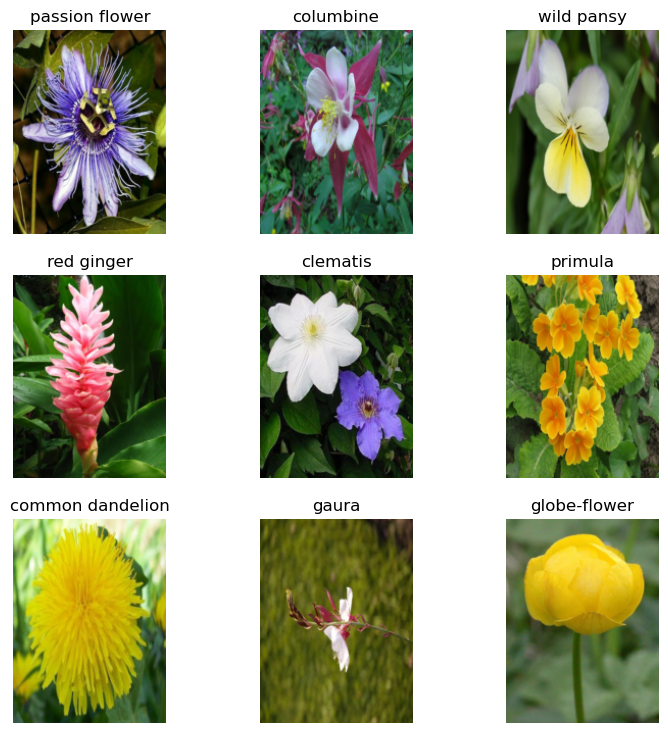

In [ ]:
len(files)
files[0]
dls.show_batch()

In [ ]:
files[0]

Path('/home/nex/.fastai/data/oxford-102-flowers/jpg/image_03822.jpg')

In [ ]:
learn.export("flowers.pkl")

In [ ]:
os.getcwd() 

'/home/nex/ml/fastai-ejercicios'

In [ ]:
learn.model


Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [ ]:
learn = load_learner(path/"flowers.pkl")

In [ ]:
learn.predict(files[1])

('cyclamen',
 tensor(30),
 tensor([2.4186e-06, 9.5657e-06, 4.6602e-05, 1.3822e-05, 1.6028e-05, 1.2740e-05,
         1.5756e-06, 6.2125e-06, 6.4875e-05, 1.1521e-05, 3.0240e-07, 5.8046e-06,
         1.2327e-06, 5.8880e-07, 1.6749e-05, 6.5684e-06, 1.4071e-06, 2.9082e-06,
         8.8074e-06, 2.5692e-05, 1.2212e-06, 2.6480e-06, 6.2637e-04, 1.7083e-05,
         2.0404e-06, 2.8276e-07, 1.0897e-06, 2.9947e-06, 5.6826e-07, 2.3131e-06,
         9.8015e-01, 1.4949e-06, 4.5864e-05, 3.0972e-07, 3.8547e-05, 1.8157e-06,
         2.7762e-06, 8.8810e-05, 2.9742e-06, 4.0671e-04, 4.2957e-06, 6.1937e-07,
         1.9365e-03, 1.7218e-05, 7.8200e-06, 3.6771e-06, 3.3154e-06, 3.9622e-05,
         1.5403e-06, 3.4468e-07, 4.6369e-06, 2.7116e-05, 4.3997e-06, 1.0231e-02,
         6.3677e-07, 3.0059e-03, 3.1473e-06, 2.0571e-07, 7.6942e-07, 1.8874e-07,
         7.4351e-06, 1.2988e-03, 3.3549e-05, 1.5267e-06, 5.7856e-07, 1.0455e-05,
         8.9358e-07, 2.0686e-05, 2.6334e-06, 2.7577e-07, 2.0021e-06, 1.1141e-06,
  

In [ ]:
files[0]

Path('/home/nex/.fastai/data/oxford-102-flowers/jpg/image_03822.jpg')